# Neural Network 

- Human brain works with biological neurone. Ability of machine to recognize things like digits object on it's own is known as neural network 
- Multiple neurons are combine to form a neural network.


## Anatonamy of Neural Network 
- There are 3 layes:
1. Input layer --> It takes Pixel as input from images.
2. Hidden layer --> Doing computations and extracting features.
3. Output layer --> Provides prediction (i.e. 0-9)

-Key concepts

1. Weight(w): Learnable parameters controlling input importance
2. Bias(b): Shift the activation function curve
3. Activation function: Change to non linearity(eg: Relu, sigmoid, tanh, etc)
4. Loss function: Measure how wrong our model
5. Optimizers: Adjust the weight to minimize loss (SGD, Adam etc)

### Math behind neural network:
    - x(i) --> Input
    - w(i) --> Weight
    - b --> Bias
    - z --> Weighted sum

    - z = w1x1 + w2x2+ ......... + wnxn + b
    - Activation function
    - a = f(z)

    - If you use ReLU
    -f(z) = max(0, z)




# Classification of digits using NN 
## MNIST: (Modified National institute of Standards and Technology)
## This is hellow world of Computer Vision
- 70k images datas for handwritten digits (0-9)
- 28*28 size images  gray scale pixel 
- Train = 60k


# Preprocessing MNIST dataset
- Before feeding the neural network
- Flatten 28*28: 784 input features (for dense layer) or keep as 28*28 is we are using CNN
- Normalization: Divide value by 255 to get in range [0,1]
- one-hot Encoding: for eg [0 0 0 1 0 0 0 0 0 0]  

# MNIST dataset Training and Evaluation

## Neural network architecture 
- Input : 784 neurons
- Hidden layer: 128 neurons (ReLU)
- Hidden layer: 64 neurons (RelU)
- Output layer: 10 neurons (0-9)

### For Training 
1. Initilize weight randomly
2. Forward pass: Compute prediction
3. Calculate loss:
    - Summation(yilog(yicap))
4. Back propagation error
5. Updated weight
6. Repeat it for many epochs until convergnaces 

### Challenges:
1. Over fitting:
    - Model memorizes training data but fails with new images data
    - Dropout, regularization
2. Under fitting:
    - Model too simple (less datasets)
3. Learning rate tuning:
    - Too high: unstable
    - Too low: slow


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

C:\Users\Roshan\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Roshan\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Roshan\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Plea

(60000, 28, 28)
(10000, 28, 28)


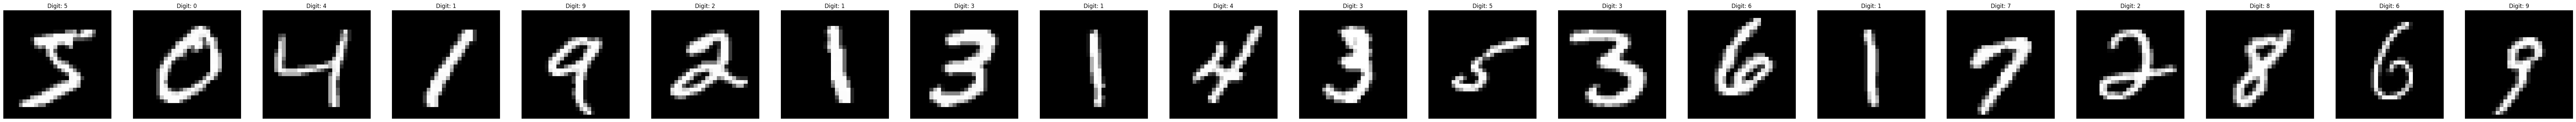

In [3]:
# load dataset and let's visualize it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

plt.figure(figsize=(100, 20))  # Very wide frame

for i in range(20):
    plt.subplot(1, 20, i+1)  # i+1 instead of i+20
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis("off")

In [4]:
# Data processing 
# Normalization

x_train = x_train/255
x_test = x_test/255

#On hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test,10)
print(y_train_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [5]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Flatten, Dense

# Build a feed forward neural network
model = Sequential([
    # Flattern layer 2D shape convert it into 784(1D) 
    Flatten(input_shape = (28,28)),
    
    #First hidden layer
    Dense(128, activation='relu'),

    # Second hidden layer
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])




C:\Users\Roshan\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    x_train, 
    y_train_cat,
    epochs = 10,  # no. of passes over entire training datas
    batch_size = 128,
    validation_split = 0.1 
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9004 - loss: 0.3514 - val_accuracy: 0.9578 - val_loss: 0.1431
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9593 - loss: 0.1387 - val_accuracy: 0.9727 - val_loss: 0.1020
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9711 - loss: 0.0970 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0733 - val_accuracy: 0.9763 - val_loss: 0.0829
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9778 - val_loss: 0.0786
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0456 - val_accuracy: 0.9768 - val_loss: 0.0766
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9763 - val_loss: 0.0793
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9912 - loss: 0.0294 - val_accuracy: 0.

In [8]:
# Model Evaluation

loss , accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy {accuracy} and loss value: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9749 - loss: 0.0865
Test accuracy 0.9749000072479248 and loss value: 0.08650864660739899


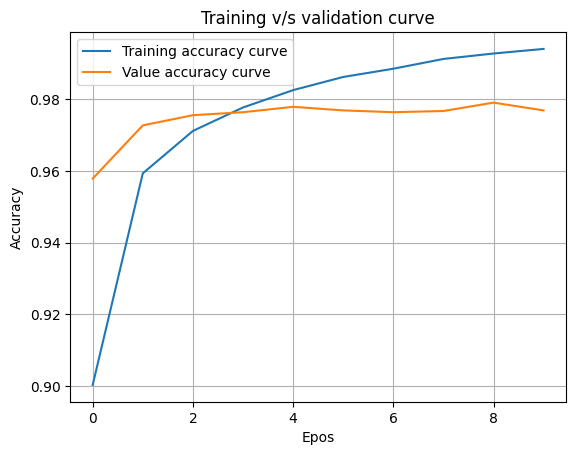

In [9]:
# Plotting the model
plt.plot(history.history['accuracy'], label='Training accuracy curve')
plt.plot(history.history['val_accuracy'], label ='Value accuracy curve')
plt.xlabel("Epos")
plt.ylabel("Accuracy")
plt.title("Training v/s validation curve")
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


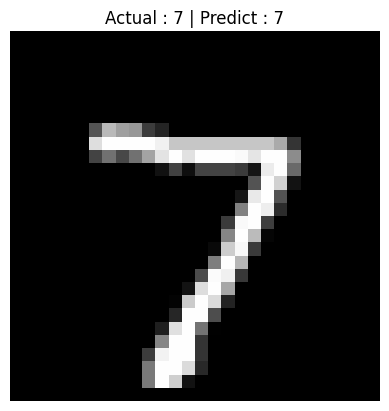

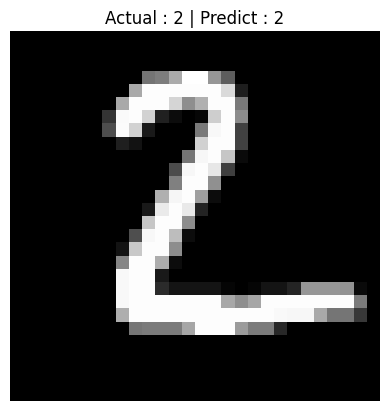

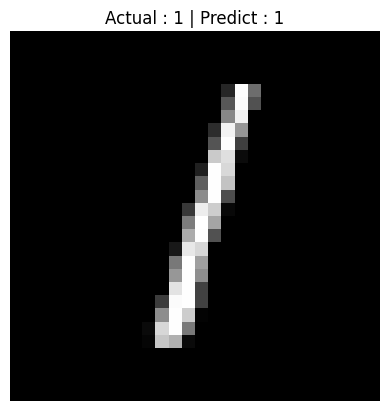

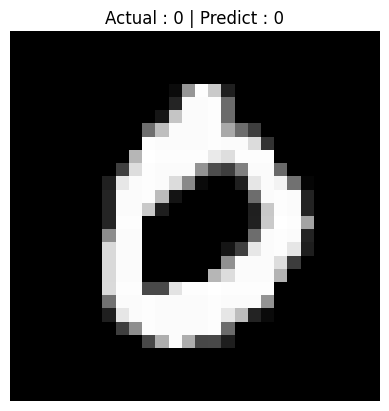

In [11]:
# Predict and visualize 
predictions = model.predict(x_test)

import numpy as np

# Convert probability vectors to class numbers
predicted_classes = np.argmax(predictions, axis=1)

for i in range(4):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Actual : {y_test[i]} | Predict : {predicted_classes[i]}')
    plt.axis('off')
    plt.show()